<a href="https://colab.research.google.com/github/YuragMA/CSST106-4B/blob/main/4B_YURAG_EXER1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Yurag, Marivient Alexia R.

BSCS - IS - 4B

DATE: SEPTEMBER 09, 2024

**EXERCISE 1: Scaling and Rotation**

**EXERCISE 2: Blurring Techniques**

**EXERCISE 3: Edge Detection Using Canny**


DATE: SEPTEMBER 16, 2024

**Apply image processing techniques (scaling, rotation, blurring, edge detection) using OpenCV**

# **Image Processing Techniques**

**1. Install OpenCV**

In [112]:
!pip install opencv-python-headless

**2. Import Libraries**

In [113]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display an image using matplotlib
def display_image(img, title="Image"):
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.axis('off')
  plt.show()

# Function to display two images side by side
def display_images(img1, img2, title1="Image 1", title2="Image 2"):
  plt.subplot(1, 2, 1)
  plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
  plt.title(title1)
  plt.axis('off')
  plt.subplot(1, 2, 2)
  plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
  plt.title(title2)
  plt.axis('off')
  plt.show()

3. **Load Image**

Saving A. 4x6.png to A. 4x6 (2).png


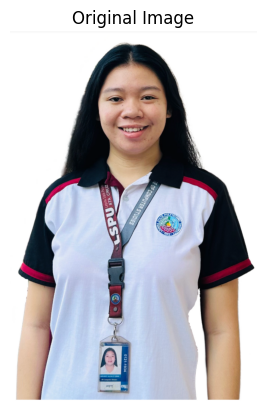

In [114]:
from google.colab import files
from io import BytesIO
from PIL import Image

#Upload an Image
uploaded = files.upload()

image_path = next(iter(uploaded))
image = Image.open(BytesIO(uploaded[image_path]))
image = cv2.cvtColor(np.array(image),cv2.COLOR_RGB2BGR)

display_image(image, "Original Image")

**Exercise 1: Scaling and Rotation**

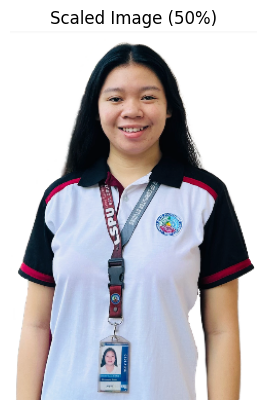

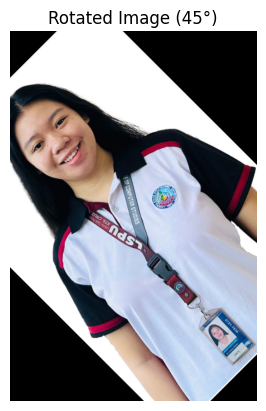

'\nThese lines apply the scaling and rotation functions to the uploaded image and display the results.\n'

In [115]:
# Scaling
def scale_image(img, scale_factor):
    height, width = img.shape[:2]
    scaled_img = cv2.resize(img,
(int(width * scale_factor), int(height * scale_factor)), interpolation=cv2.INTER_LINEAR)
    return scaled_img

"""
scale_image(): This function scales the image by a given factor.
The cv2.resize() function takes the original dimensions of the image,
multiplies them by the scale_factor, and resizes the image accordingly.
INTER_LINEAR is a common interpolation method for resizing.
"""

# Rotate
def rotate_image(img, angle):
    height, width = img.shape[:2]
    center = (width // 2, height // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_img = cv2.warpAffine(img, matrix, (width, height))
    return rotated_img

"""
rotate_image(): Rotates the image around its center. cv2.getRotationMatrix2D() creates
a transformation matrix for rotation, and cv2.warpAffine() applies this transformation.
The angle parameter controls the degree of rotation.
"""

# Scale image by 0.5
scaled_image = scale_image(image, 0.2)
display_image(scaled_image, "Scaled Image (50%)")

# Rotate image by 45 degrees
rotated_image = rotate_image(image, 45)
display_image(rotated_image, "Rotated Image (45°)")

"""
These lines apply the scaling and rotation functions to the uploaded image and display the results.
"""

**Exercise 2: Blurring Techniques**

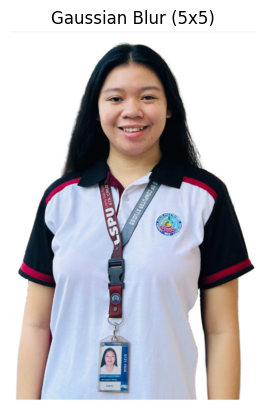

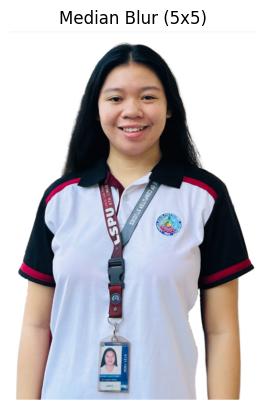

"\ncv2.medianBlur(): Applies a median blur, which replaces each pixel's value with the\nmedian value of its neighbors in a 5x5 kernel. This method is particularly effective in\nremoving salt-and-pepper noise.\n"

In [116]:
# Gaussian Blur
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
display_image(gaussian_blur, "Gaussian Blur (5x5)")

"""
cv2.GaussianBlur(): Applies a Gaussian blur to the image, which smooths it by averaging
the pixel values in a 5x5 kernel (a small matrix). This is useful for reducing noise in an image.
"""
# Median Blur
median_blur = cv2.medianBlur(image, 5)
display_image(median_blur, "Median Blur (5x5)")

"""
cv2.medianBlur(): Applies a median blur, which replaces each pixel's value with the
median value of its neighbors in a 5x5 kernel. This method is particularly effective in
removing salt-and-pepper noise.
"""

**Exercise 3: Edge Detection using Canny**

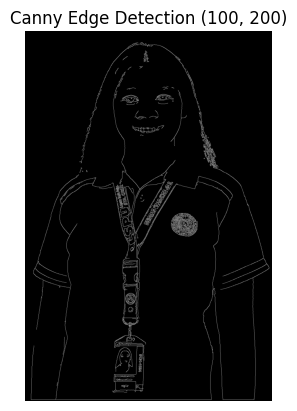

"\ncv2.Canny(): Detects edges in the image by calculating the gradient (rate of intensity change)\nbetween pixels. The two threshold values (100 and 200) define the edges'\nsensitivity. Lower thresholds detect more edges, while higher thresholds detect only the\nmost prominent edges.\n"

In [108]:
# Canny Edge Detection
edges = cv2.Canny(image, 100, 200)
display_image(edges, "Canny Edge Detection (100, 200)")

"""
cv2.Canny(): Detects edges in the image by calculating the gradient (rate of intensity change)
between pixels. The two threshold values (100 and 200) define the edges'
sensitivity. Lower thresholds detect more edges, while higher thresholds detect only the
most prominent edges.
"""

**Exercise 4: Basic Image Processor (Interactive)**

In [117]:
def process_image(img, action):
  if action == 'scale':
    return scale_image(img, 0.5)
  elif action == 'rotate':
    return rotate_image(img, 45)
  elif action == 'gaussian_blur':
    return cv2.GaussianBlur(img, (5, 5), 0)
  elif action == 'median_blur':
    return cv2.medianBlur(img, 5)
  elif action == 'canny':
    return cv2.Canny(img, 100, 200)
  else:
    return img

Enter action (scale, rotate, gaussian_blur, median_blur, canny): canny


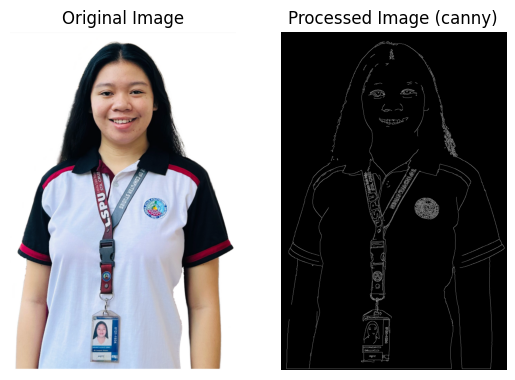

In [121]:
action = input("Enter action (scale, rotate, gaussian_blur, median_blur, canny): ")
processed_image = process_image(image, action)
display_images(image, processed_image, "Original Image", f"Processed Image ({action})")

**Exercise 5: Comparison of Filtering Techniques**

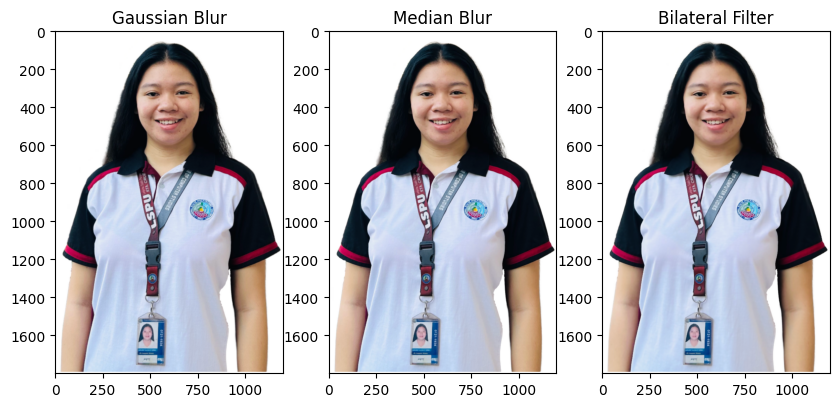

'\nExplanation: This displays the images processed by different filtering techniques (Gaussian,\nMedian, and Bilateral) side by side for comparison.\n'

In [120]:
# Applying Gaussian, Median, and Bilateral filters
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
median_blur = cv2.medianBlur(image, 5)
bilateral_filter = cv2.bilateralFilter(image, 9, 75, 75)

"""
cv2.bilateralFilter(): This filter smooths the image while keeping edges sharp, unlike
Gaussian or median filters. It’s useful for reducing noise while preserving details.
"""

# Display the results for comparison
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur")
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))
plt.title("Median Blur")
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(bilateral_filter, cv2.COLOR_BGR2RGB))
plt.title("Bilateral Filter")
plt.show()

"""
Explanation: This displays the images processed by different filtering techniques (Gaussian,
Median, and Bilateral) side by side for comparison.
"""

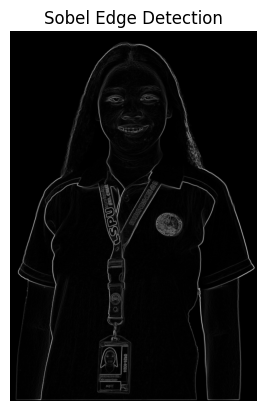

In [122]:
# Sobel Edge Detection
def sobel_edge_detection(img):

# Convert to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Sobel edge detection in the x direction
  sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
# Sobel edge detection in the y direction
  sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
# Combine the two gradients
  sobel_combined = cv2.magnitude(sobelx, sobely)
  return sobel_combined

  # Apply Sobel edge detection to the uploaded image
sobel_edges = sobel_edge_detection(image)
plt.imshow(sobel_edges, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')
plt.show()

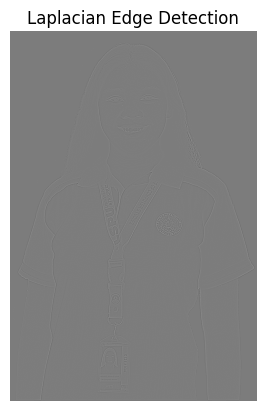

In [123]:
# Laplacian Edge Detection
def laplacian_edge_detection(img):
# Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Apply Laplacian operator
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    return laplacian

# Apply Laplacian edge detection to the uploaded image
laplacian_edges = laplacian_edge_detection(image)
plt.imshow(laplacian_edges, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis('off')
plt.show()

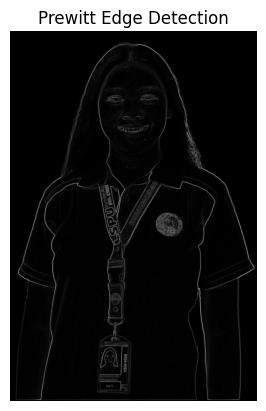

In [124]:
# Prewitt Edge Detection
def prewitt_edge_detection(img):
# Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Prewitt operator kernels for x and y directions
    kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=int)
    kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=int)
# Applying the Prewitt operator
    prewittx = cv2.filter2D(gray, cv2.CV_64F, kernelx)
    prewitty = cv2.filter2D(gray, cv2.CV_64F, kernely)
# Combine the x and y gradients by converting to floating point
    prewitt_combined = cv2.magnitude(prewittx, prewitty)

    return prewitt_combined

  # Apply Prewitt edge detection to the uploaded image
prewitt_edges = prewitt_edge_detection(image)
plt.imshow(prewitt_edges, cmap='gray')
plt.title("Prewitt Edge Detection")
plt.axis('off')
plt.show()

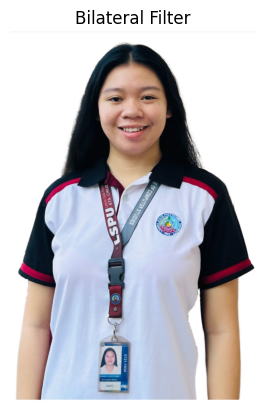

In [125]:
# Bilateral Filter
def bilateral_blur(img):
    bilateral = cv2.bilateralFilter(img, 9, 75, 75)
    return bilateral
# Apply Bilateral filter to the uploaded image
bilateral_blurred = bilateral_blur(image)
plt.imshow(cv2.cvtColor(bilateral_blurred, cv2.COLOR_BGR2RGB))
plt.title("Bilateral Filter")
plt.axis('off')
plt.show()

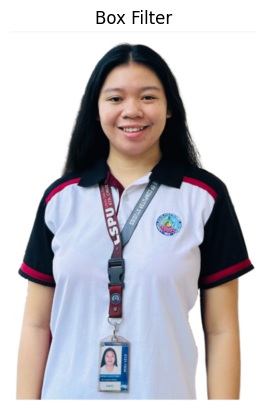

In [126]:
# Box Filter
def box_blur(img):
    box = cv2.boxFilter(img, -1, (5, 5))
    return box

# Apply Box filter to the uploaded image
box_blurred = box_blur(image)
plt.imshow(cv2.cvtColor(box_blurred, cv2.COLOR_BGR2RGB))
plt.title("Box Filter")
plt.axis('off')
plt.show()

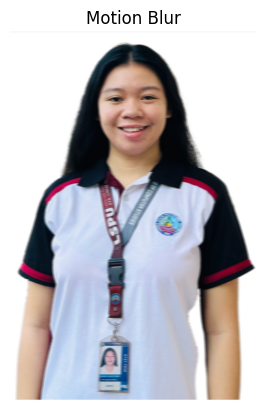

In [127]:
# Motion Blur
def motion_blur(img):
# Create motion blur kernel (size 15x15)
    kernel_size = 15
    kernel = np.zeros((kernel_size, kernel_size))
    kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)
    kernel = kernel / kernel_size

  # Apply motion blur
    motion_blurred = cv2.filter2D(img, -1, kernel)
    return motion_blurred

# Apply Motion blur to the uploaded image
motion_blurred = motion_blur(image)
plt.imshow(cv2.cvtColor(motion_blurred, cv2.COLOR_BGR2RGB))
plt.title("Motion Blur")
plt.axis('off')
plt.show()


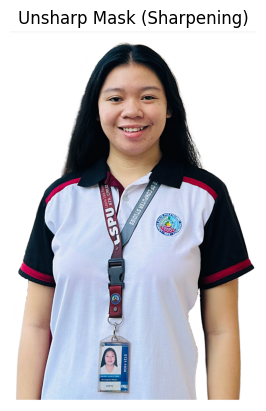

In [128]:
# Unsharp Masking (Sharpening)
def unsharp_mask(img):
# Create a Gaussian blur version of the image
    blurred = cv2.GaussianBlur(img, (9, 9), 10.0)
# Sharpen by adding the difference between the original and the blurred image
    sharpened = cv2.addWeighted(img, 1.5, blurred, -0.5, 0)
    return sharpened
# Apply Unsharp Masking to the uploaded image
sharpened_image = unsharp_mask(image)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title("Unsharp Mask (Sharpening)")
plt.axis('off')
plt.show()

Enter action (scale, rotate, gaussian_blur, median_blur, canny, sobel, laplacian, prewitt, bilateral_blur, box_blur, motion_blur: rotate


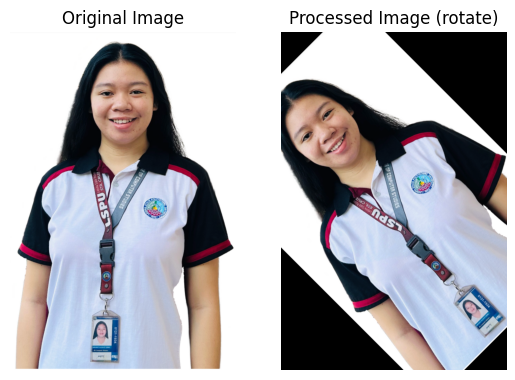

In [135]:
# Update process_image function to include new blurring techniques
def process_image(img, action):
    if action == 'scale':
      return scale_image(img, 0.5)
    elif action == 'rotate':
      return rotate_image(img, 45)
    elif action == 'gaussian_blur':
      return cv2.GaussianBlur(img, (5, 5), 0)
    elif action == 'median_blur':
      return cv2.medianBlur(img, 5)
    elif action == 'canny':
      return cv2.Canny(img, 100, 200)
    elif action == 'sobel':
      return sobel_edge_detection(img)
    elif action == 'laplacian':
        return laplacian_edge_detection(img)
    elif action == 'prewitt':
      return prewitt_edge_detection(img)
    elif action == 'bilateral_blur':
      return bilateral_blur(img)
    elif action == 'box_blur':
      return box_blur(img)
    elif action == 'motion_blur':
      return motion_blur(img)
    elif action == 'unsharp_mask':
      return unsharp_mask(img)
    else:
      return img

# Add new blurring options for interactive processing
action = input("Enter action (scale, rotate, gaussian_blur, median_blur, canny, sobel, laplacian, prewitt, bilateral_blur, box_blur, motion_blur: ")
processed_image = process_image(image, action)
display_images(image, processed_image, "Original Image", f"Processed Image ({action})")

**SUMMARY VISUALIZATION**

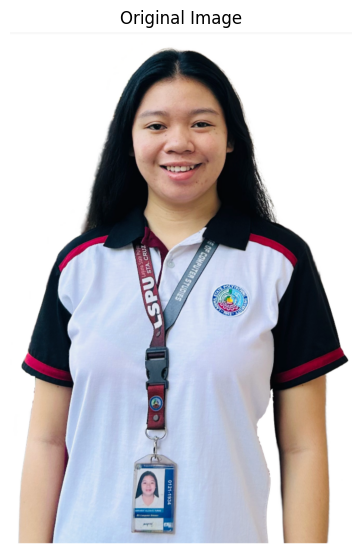

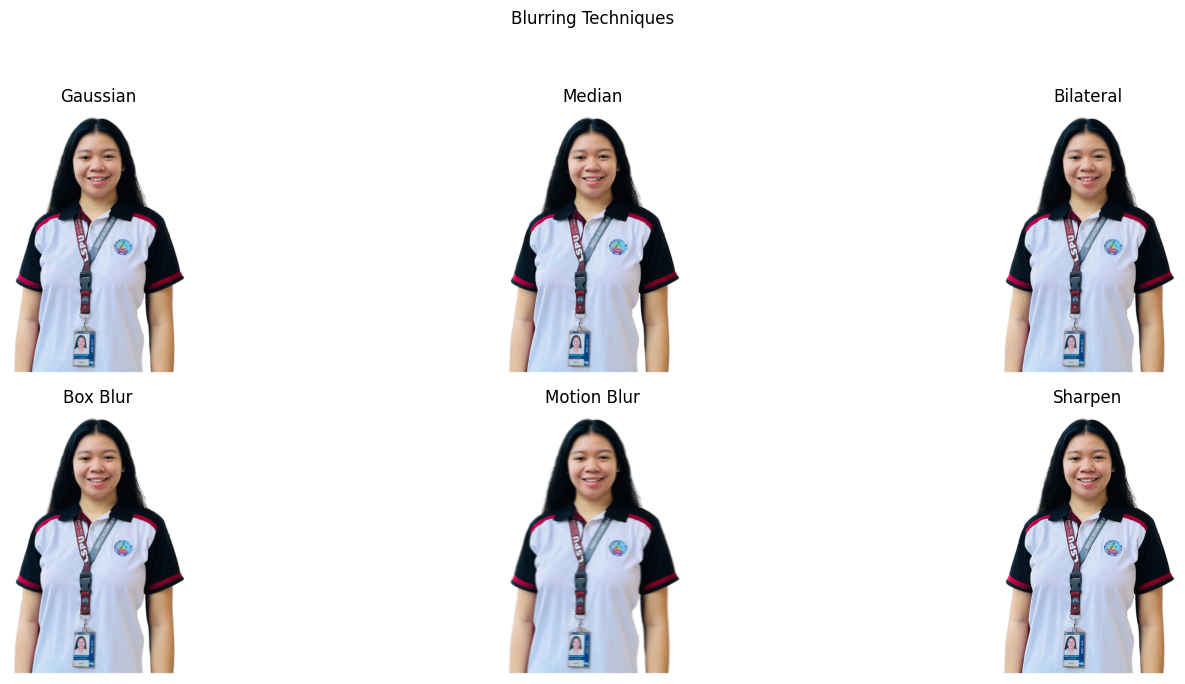

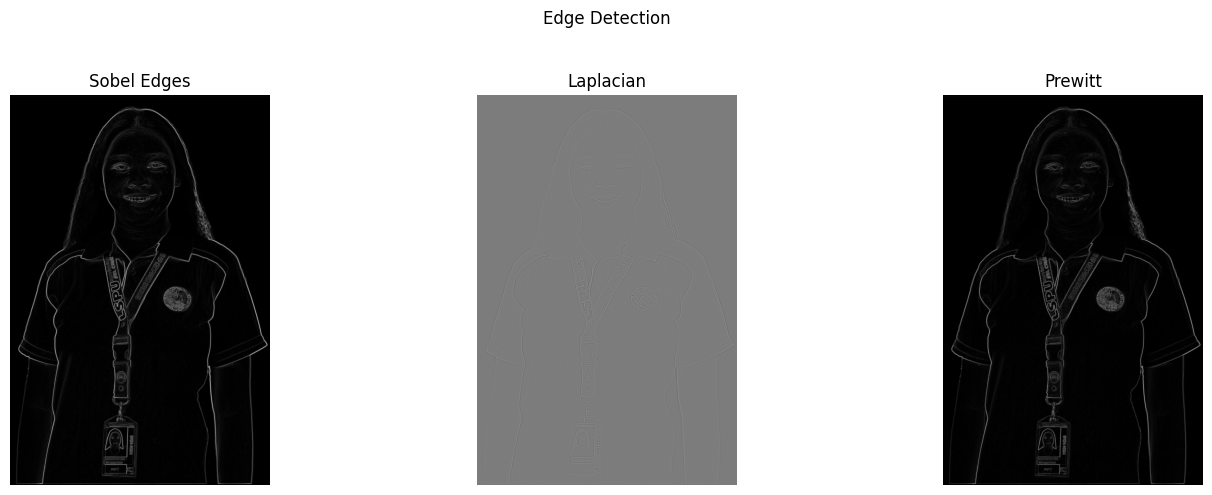

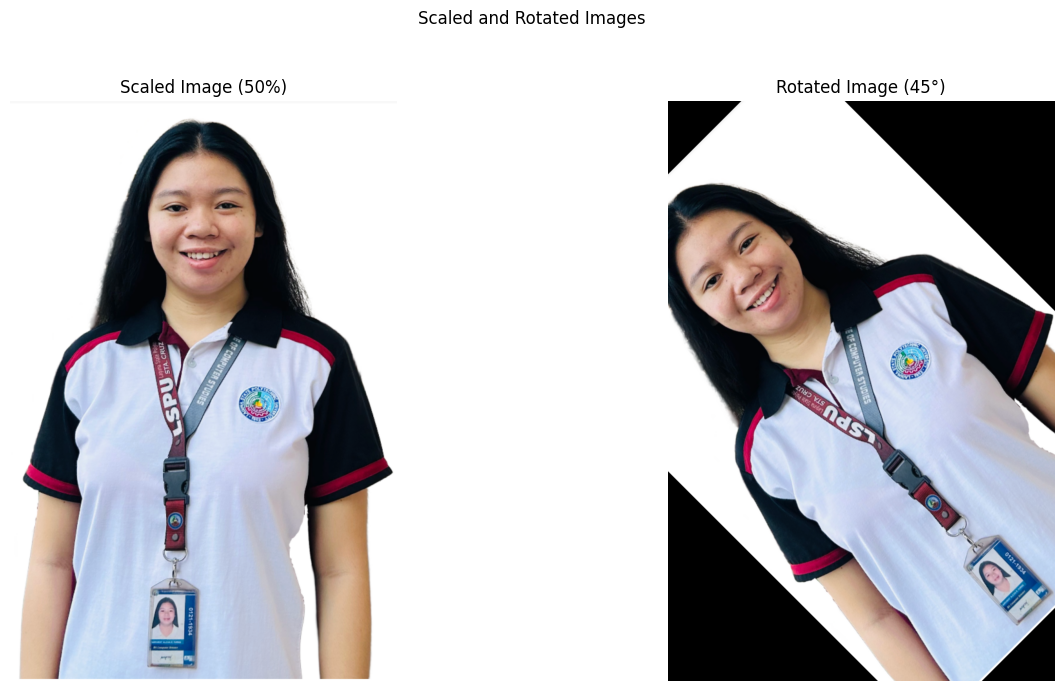

In [136]:
# Original Image
plt.figure(figsize=(15, 15))

# Original Image at the top
plt.subplot(2,3,1)
plt.axis('off')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Blurring Techniques
plt.figure(figsize=(15, 10))

# Blurring Techniques
plt.subplot(3, 3, 1)
plt.axis('off')
plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
plt.title('Gaussian')

plt.subplot(3, 3, 2)
plt.axis('off')
plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))
plt.title('Median')

plt.subplot(3, 3, 3)
plt.axis('off')
plt.imshow(cv2.cvtColor(bilateral_filter, cv2.COLOR_BGR2RGB))
plt.title('Bilateral')

plt.subplot(3, 3, 4)
plt.axis('off')
plt.imshow(cv2.cvtColor(box_blurred, cv2.COLOR_BGR2RGB))
plt.title('Box Blur')

plt.subplot(3, 3, 5)
plt.axis('off')
plt.imshow(cv2.cvtColor(motion_blurred, cv2.COLOR_BGR2RGB))
plt.title('Motion Blur')

plt.subplot(3, 3, 6)
plt.axis('off')
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title('Sharpen')

plt.suptitle('Blurring Techniques')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Edge Detection
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel Edges')

plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(laplacian_edges, cmap='gray')
plt.title('Laplacian')

plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(prewitt_edges, cmap='gray')
plt.title('Prewitt')

plt.suptitle('Edge Detection')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Scale and Rotate
plt.figure(figsize=(15, 7))

scaled_image = scale_image(image, 0.5)
rotated_image = rotate_image(image, 45)

plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
plt.title('Scaled Image (50%)')

plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image (45°)')

plt.suptitle('Scaled and Rotated Images')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()